In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [236]:
df_patient = pd.read_csv('PatientTreatment.csv')
df_patient

,patient,action,resource,DateTime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09
...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13


In [4]:
len(pd.unique(df_patient.patient))

100

In [24]:
df_patient.dtypes

patient     object
action      object
resource    object
DateTime    object
dtype: object

In [237]:
df_patient['DateTime']= pd.to_datetime(df_patient['DateTime'])
df_patient['action']= df_patient['action'].astype('category')
df_patient['resource']= df_patient['resource'].astype('category')


In [26]:
df_patient.dtypes

patient             object
action            category
resource          category
DateTime    datetime64[ns]
dtype: object

In [27]:
action_counter = df_patient['action'].value_counts().to_frame().reset_index()
action_counter.rename(columns={'index' : 'action' , 'action' : 'number'} , inplace=True)
action_counter.sort_values(by = ['number'] , ascending=True , inplace=True)
action_counter

,action,number
7,Surgery,20
6,Medicine,80
5,X-ray scan,90
0,Blood test,100
1,Final consult,100
2,First consult,100
3,Physical test,100
4,Second consult,100


Text(0.5, 1.0, 'number of actions done by patients')

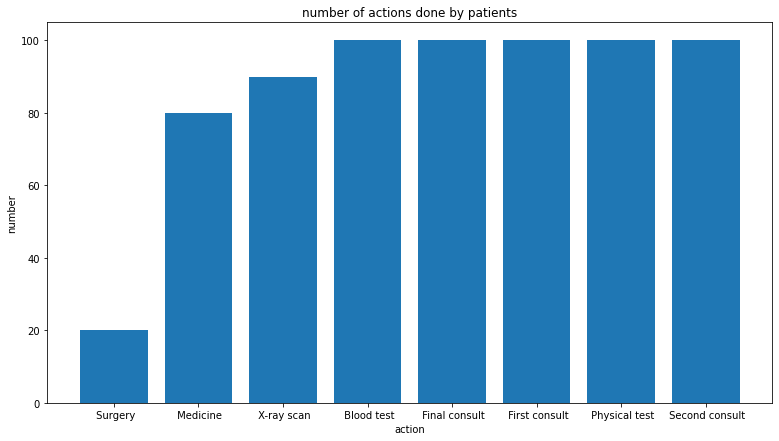

In [28]:
plt.figure(figsize = (13 , 7) )
plt.bar(action_counter.action , action_counter.number )
plt.xlabel("action")
plt.ylabel('number')
plt.title('number of actions done by patients')

In [29]:
resource_counter = df_patient['resource'].value_counts().to_frame().reset_index()
resource_counter.rename(columns={'index' : 'resource' , 'resource' : 'number'} , inplace=True)
resource_counter.sort_values(by = ['number'] , ascending=True , inplace=True)
resource_counter

,resource,number
12,Dr. Quinn,3
10,Dr. Alex,5
11,Dr. Charlie,5
9,Dr. Rudy,7
8,Team 1,40
7,Nurse Corey,43
5,Dr. Ben,50
6,Team 2,50
4,Nurse Jesse,57
3,Pharmacy,80


Text(0.5, 1.0, 'number of resources used by patients')

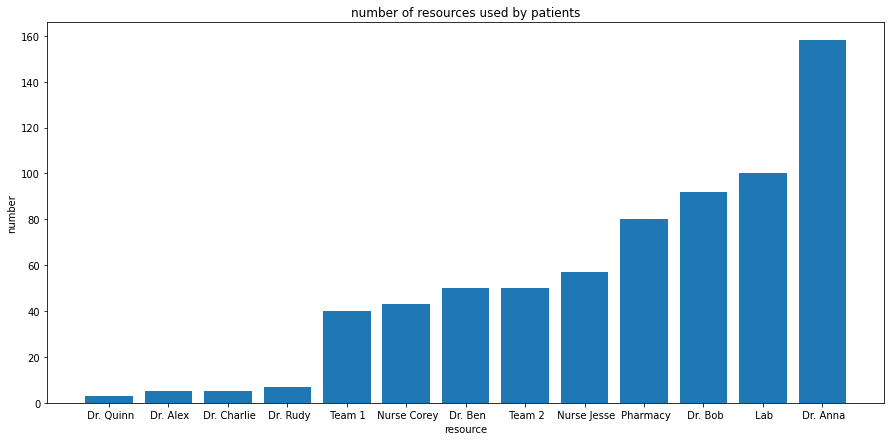

In [30]:
plt.figure(figsize = (15 , 7) )
plt.bar(resource_counter.resource , resource_counter.number )
plt.xlabel("resource")
plt.ylabel('number')
plt.title('number of resources used by patients')

In [22]:
import seaborn as sns

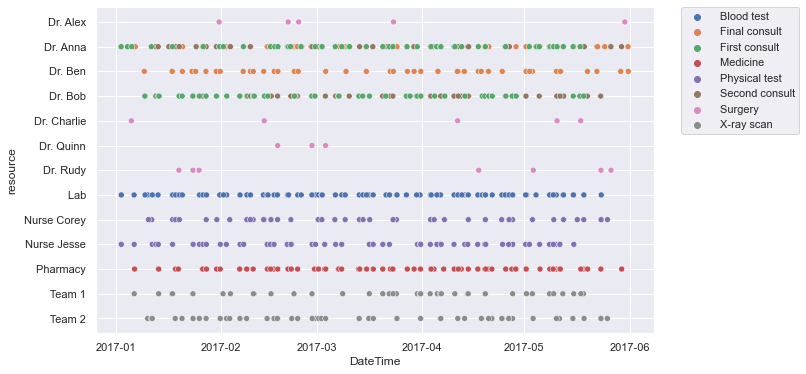

In [36]:
sns.set(rc={'figure.figsize':(10,6)})
sns.scatterplot(data = df_patient, x = 'DateTime' , y = 'resource' , hue="action")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


<AxesSubplot:xlabel='action', ylabel='patient'>

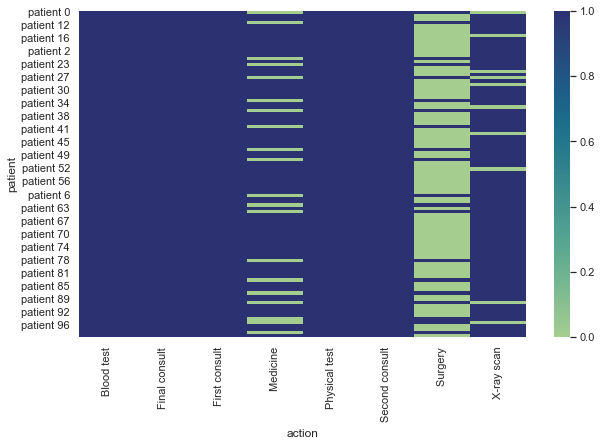

In [60]:
heatmap = pd.crosstab(df_patient['patient'] , df_patient['action'])
sns.heatmap(heatmap , cmap =  "crest")


In [242]:
min_date = df_patient.sort_values(by = ['DateTime'] , ascending= True)['DateTime'][0]

In [245]:
df_patient[df_patient.patient == 'patient 0'].sort_values(by = 'DateTime').iloc[0,:].DateTime 

Timestamp('2017-01-02 11:40:11')

In [306]:
for i in pd.unique(df_patient.patient):
    df_patient.loc[df_patient.patient == i , 'minDate'] =  df_patient[df_patient.patient == i][df_patient.action == ' First consult'].iloc[0,:].DateTime 
    df_patient.loc[df_patient.patient == i , 'maxDate'] =  df_patient[df_patient.patient == i][df_patient.action == ' Final consult'].iloc[0,:].DateTime 
df_patient

,patient,action,resource,DateTime,minDate,timeDifference,maxDate,domain
325,patient 47,Second consult,Dr. Anna,2017-03-21 16:24:41,2017-03-10 09:27:44,975417.0,2017-03-27 12:10:48,1478584.0
322,patient 47,X-ray scan,Team 1,2017-03-16 11:37:27,2017-03-10 09:27:44,526183.0,2017-03-27 12:10:48,1478584.0
326,patient 47,Surgery,Dr. Alex,2017-03-23 14:44:57,2017-03-10 09:27:44,1142233.0,2017-03-27 12:10:48,1478584.0
324,patient 47,Physical test,Nurse Jesse,2017-03-16 12:21:37,2017-03-10 09:27:44,528833.0,2017-03-27 12:10:48,1478584.0
327,patient 47,Final consult,Dr. Anna,2017-03-27 12:10:48,2017-03-10 09:27:44,1478584.0,2017-03-27 12:10:48,1478584.0
...,...,...,...,...,...,...,...,...
528,patient 76,Medicine,Pharmacy,2017-04-19 17:14:14,2017-04-19 10:52:43,22891.0,2017-04-20 12:26:47,92044.0
529,patient 76,Final consult,Dr. Ben,2017-04-20 12:26:47,2017-04-19 10:52:43,92044.0,2017-04-20 12:26:47,92044.0
527,patient 76,Second consult,Dr. Anna,2017-04-19 15:59:10,2017-04-19 10:52:43,18387.0,2017-04-20 12:26:47,92044.0
526,patient 76,Physical test,Nurse Corey,2017-04-19 14:40:28,2017-04-19 10:52:43,13665.0,2017-04-20 12:26:47,92044.0


In [303]:
for i in df_patient.index:
    dif = df_patient.loc[i,'DateTime'] - df_patient.loc[i,'minDate']
    df_patient.loc[i , 'timeDifference'] = dif.days * 24 * 3600 + dif.seconds
    dif = df_patient.loc[i,'maxDate'] - df_patient.loc[i,'minDate']
    df_patient.loc[i , 'domain'] = dif.days * 24 * 3600 + dif.seconds
df_patient

,patient,action,resource,DateTime,minDate,timeDifference,maxDate,domain
483,patient 70,Blood test,Lab,2017-04-14 10:06:16,2017-04-10 09:39:16,347220.0,2017-04-18 09:31:56,690760.0
485,patient 70,Second consult,Dr. Bob,2017-04-14 14:44:23,2017-04-10 09:39:16,363907.0,2017-04-18 09:31:56,690760.0
484,patient 70,Physical test,Nurse Jesse,2017-04-14 10:40:59,2017-04-10 09:39:16,349303.0,2017-04-18 09:31:56,690760.0
481,patient 70,First consult,Dr. Anna,2017-04-10 09:39:16,2017-04-10 09:39:16,0.0,2017-04-18 09:31:56,690760.0
482,patient 70,X-ray scan,Team 1,2017-04-14 08:56:27,2017-04-10 09:39:16,343031.0,2017-04-18 09:31:56,690760.0
...,...,...,...,...,...,...,...,...
426,patient 62,X-ray scan,Team 2,2017-04-06 08:46:50,2017-03-30 15:19:58,581212.0,2017-04-12 15:21:36,1123298.0
431,patient 62,Final consult,Dr. Anna,2017-04-12 15:21:36,2017-03-30 15:19:58,1123298.0,2017-04-12 15:21:36,1123298.0
428,patient 62,Blood test,Lab,2017-04-06 09:46:45,2017-03-30 15:19:58,584807.0,2017-04-12 15:21:36,1123298.0
429,patient 62,Second consult,Dr. Bob,2017-04-06 11:51:33,2017-03-30 15:19:58,592295.0,2017-04-12 15:21:36,1123298.0


In [304]:
df_patient.sort_values(by = ['domain'] , ascending = False , inplace = True)
df_patient

,patient,action,resource,DateTime,minDate,timeDifference,maxDate,domain
325,patient 47,Second consult,Dr. Anna,2017-03-21 16:24:41,2017-03-10 09:27:44,975417.0,2017-03-27 12:10:48,1478584.0
322,patient 47,X-ray scan,Team 1,2017-03-16 11:37:27,2017-03-10 09:27:44,526183.0,2017-03-27 12:10:48,1478584.0
326,patient 47,Surgery,Dr. Alex,2017-03-23 14:44:57,2017-03-10 09:27:44,1142233.0,2017-03-27 12:10:48,1478584.0
324,patient 47,Physical test,Nurse Jesse,2017-03-16 12:21:37,2017-03-10 09:27:44,528833.0,2017-03-27 12:10:48,1478584.0
327,patient 47,Final consult,Dr. Anna,2017-03-27 12:10:48,2017-03-10 09:27:44,1478584.0,2017-03-27 12:10:48,1478584.0
...,...,...,...,...,...,...,...,...
528,patient 76,Medicine,Pharmacy,2017-04-19 17:14:14,2017-04-19 10:52:43,22891.0,2017-04-20 12:26:47,92044.0
529,patient 76,Final consult,Dr. Ben,2017-04-20 12:26:47,2017-04-19 10:52:43,92044.0,2017-04-20 12:26:47,92044.0
527,patient 76,Second consult,Dr. Anna,2017-04-19 15:59:10,2017-04-19 10:52:43,18387.0,2017-04-20 12:26:47,92044.0
526,patient 76,Physical test,Nurse Corey,2017-04-19 14:40:28,2017-04-19 10:52:43,13665.0,2017-04-20 12:26:47,92044.0


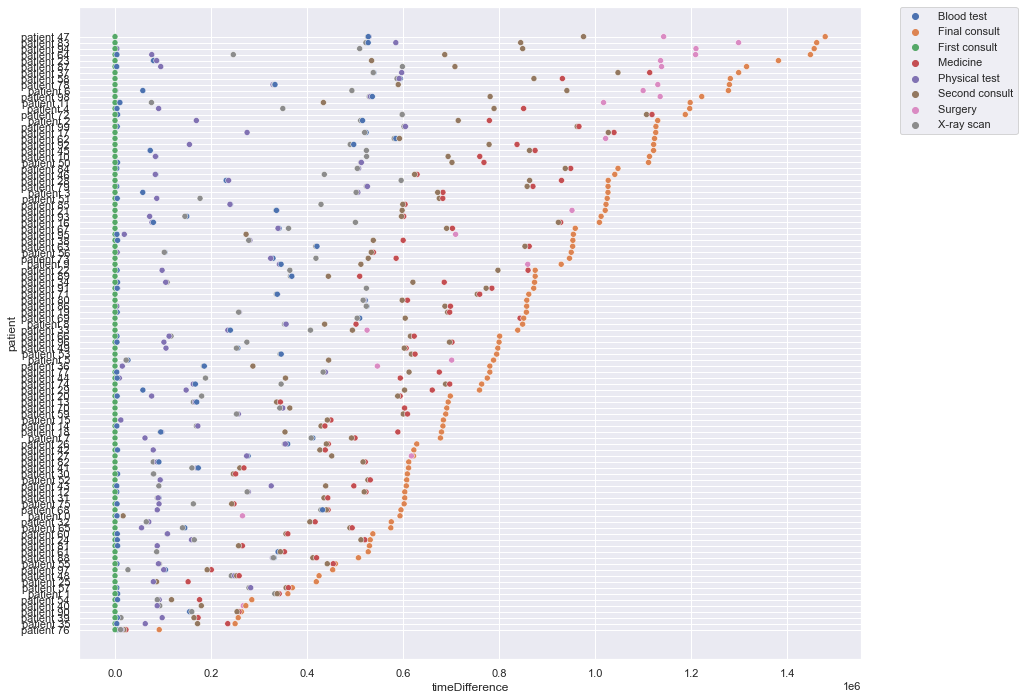

In [311]:
sns.set(rc={'figure.figsize':(14,12)})
sns.scatterplot(data = df_patient, x = 'timeDifference' , y = 'patient' , hue="action")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [190]:
df_patient['DateTime'][0]

Timestamp('2017-01-02 11:40:11')

In [149]:
dict = {}
for a in df_patient.action: 
    dict[a] = 0
dict

{' First consult': 0,
 ' Blood test': 0,
 ' Physical test': 0,
 ' Second consult': 0,
 ' Surgery': 0,
 ' Final consult': 0,
 ' X-ray scan': 0,
 ' Medicine': 0}

In [150]:
for i in df_patient.index:
    dict[df_patient.loc[i , 'action']]+=1

In [151]:
dict

{' First consult': 100,
 ' Blood test': 100,
 ' Physical test': 100,
 ' Second consult': 100,
 ' Surgery': 20,
 ' Final consult': 100,
 ' X-ray scan': 90,
 ' Medicine': 80}

In [153]:
df_p =df_patient.copy()
df_p.drop(['timeDifference'] , axis = 1 , inplace=True)

In [157]:
patinet_ser =df_p[df_patient.action == ' Surgery']['patient']

In [312]:
list = []
for i in patinet_ser:
    dif = df_p.loc[df_p.patient == i][df_p.action == ' Surgery'].iloc[0,:].DateTime - df_p.loc[df_p.patient == i][df_p.action == ' Second consult'].iloc[0,:].DateTime
    list.append( dif.days *24*3600 + dif.seconds   )

In [207]:
# s_list = []
# for i in range(len(list)):
#     s_list.append(list[i].astype('timedelta64[s]').astype(np.int32))

In [218]:
# len(s_list)

20

In [2]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:ylabel='Density'>

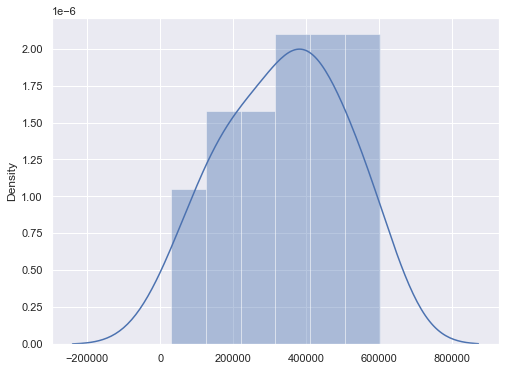

In [314]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(list , bins = 6)


# PART 2:

In [3]:
transaction = pd.read_csv('transaction.csv')
transaction

,transaction_id,product_id,customer_id,transaction_date,online_order,product_size
0,1,2,2950,2017-02-25,0.0,medium
1,2,3,3120,2017-05-21,1.0,large
2,3,37,402,2017-10-16,0.0,medium
3,4,88,3135,2017-08-31,0.0,medium
4,5,78,787,2017-10-01,1.0,large
...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,medium
19996,19997,41,127,2017-11-09,1.0,medium
19997,19998,87,2284,2017-04-14,1.0,medium
19998,19999,6,2764,2017-07-03,0.0,medium


In [61]:
min(transaction.transaction_date)

'2017-01-01'

In [7]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    20000 non-null  int64  
 1   product_id        20000 non-null  int64  
 2   customer_id       20000 non-null  int64  
 3   transaction_date  20000 non-null  object 
 4   online_order      19640 non-null  float64
 5   product_size      19803 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 937.6+ KB


In [4]:
transaction['transaction_date']= pd.to_datetime(transaction['transaction_date'])
transaction['product_size']= transaction['product_size'].astype('category')
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    20000 non-null  int64         
 1   product_id        20000 non-null  int64         
 2   customer_id       20000 non-null  int64         
 3   transaction_date  20000 non-null  datetime64[ns]
 4   online_order      19640 non-null  float64       
 5   product_size      19803 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(3)
memory usage: 801.0 KB


In [100]:
lists = []
for id in pd.unique(transaction.customer_id):
    date = transaction[transaction.customer_id == id]['transaction_date']
    dates = date.sort_values().reset_index().transaction_date
    list = []
    for i in range(len(dates)):
        list.append(int(str(dates[i])[5:7]) - int(str(dates[0])[5:7]))
    lists.append(list)


In [ ]:
lists2 = []
for l in lists:
    b = []
    [b.append(i) for i in l if i not in b]
    lists2.append(b)


In [109]:
dict = {}
for i in range(12):
    dict[i] = 0
count = len(lists2)
for i in lists2:
    for j in range(12):
        if j in i:
            dict[j] += 1  
        else:
            break 


In [110]:
for i in range(12):
    dict[i] = dict[i] / count

Text(0, 0.5, 'retention rate')

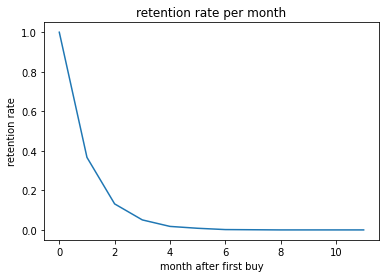

In [111]:
plt.plot( dict.keys() ,  dict.values()    )   
plt.title("retention rate per month")
plt.xlabel("month after first buy")
plt.ylabel("retention rate")
 

drop duplicates in online order 

In [113]:
transaction2 = transaction[transaction['online_order'].notna()]

In [114]:
transaction_online = transaction2[transaction2['online_order']  == 1.0]
transaction_offline = transaction2[transaction2['online_order']  == 0.0]


In [115]:
lists = []
for id in pd.unique(transaction_online.customer_id):
    date = transaction_online[transaction_online.customer_id == id]['transaction_date']
    dates = date.sort_values().reset_index().transaction_date
    list = []
    for i in range(len(dates)):
        list.append(int(str(dates[i])[5:7]) - int(str(dates[0])[5:7]))
    lists.append(list)

lists_ = []
for id in pd.unique(transaction_offline.customer_id):
    date = transaction_offline[transaction_offline.customer_id == id]['transaction_date']
    dates = date.sort_values().reset_index().transaction_date
    list = []
    for i in range(len(dates)):
        list.append(int(str(dates[i])[5:7]) - int(str(dates[0])[5:7]))
    lists_.append(list)


In [116]:
lists2 = []
for l in lists:
    b = []
    [b.append(i) for i in l if i not in b]
    lists2.append(b)
lists_2 = []
for l in lists_:
    b = []
    [b.append(i) for i in l if i not in b]
    lists_2.append(b)


In [126]:
dict = {}
for i in range(12):
    dict[i] = 0
count = len(lists2)
for i in lists2:
    for j in range(12):
        if j in i:
            dict[j] += 1  
        else:
            break 

dict2 = {}
for i in range(12):
    dict2[i] = 0
count2 = len(lists_2)
for i in lists_2:
    for j in range(12):
        if j in i:
            dict2[j] += 1  
        else:
            break 

In [127]:
for i in range(12):
    dict[i] = dict[i] / count
for i in range(12):
    dict2[i] = dict2[i] / count2

Text(0, 0.5, 'retention rate')

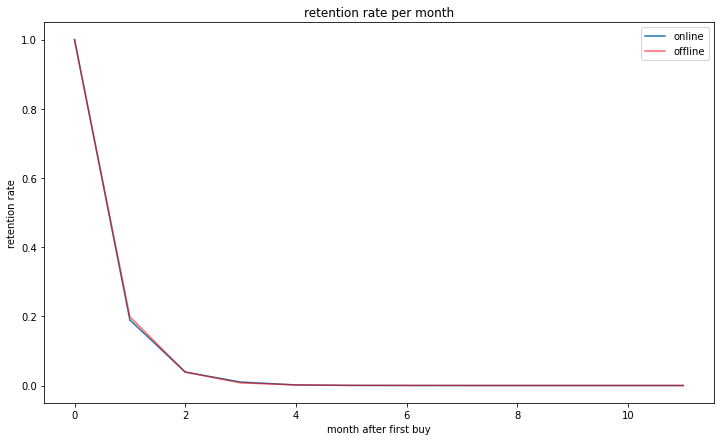

In [158]:
plt.figure(figsize=(12,7))
plt.plot( dict.keys() ,  dict.values()  , label = "online" ,  )  
plt.plot( dict2.keys() ,  dict2.values()   , label = "offline" , color = 'red' , alpha = 0.6)   
plt.legend()
plt.title("retention rate per month")
plt.xlabel("month after first buy")
plt.ylabel("retention rate")
 

### 3 

In [135]:
transaction3 = transaction[transaction['product_size'].notna()]

In [136]:
transaction_small = transaction3[transaction3['product_size']  == 'small']
transaction_medium = transaction3[transaction3['product_size']  == 'medium']
transaction_large = transaction3[transaction3['product_size']  == 'large']

In [159]:
lists = []
for id in pd.unique(transaction_small.customer_id):
    date = transaction_small[transaction_small.customer_id == id]['transaction_date']
    dates = date.sort_values().reset_index().transaction_date
    list = []
    for i in range(len(dates)):
        list.append(int(str(dates[i])[5:7]) - int(str(dates[0])[5:7]))
    lists.append(list)

lists_ = []
for id in pd.unique(transaction_medium.customer_id):
    date = transaction_medium[transaction_medium.customer_id == id]['transaction_date']
    dates = date.sort_values().reset_index().transaction_date
    list = []
    for i in range(len(dates)):
        list.append(int(str(dates[i])[5:7]) - int(str(dates[0])[5:7]))
    lists_.append(list)


_lists_ = []
for id in pd.unique(transaction_large.customer_id):
    date = transaction_large[transaction_large.customer_id == id]['transaction_date']
    dates = date.sort_values().reset_index().transaction_date
    list = []
    for i in range(len(dates)):
        list.append(int(str(dates[i])[5:7]) - int(str(dates[0])[5:7]))
    _lists_.append(list)


In [160]:
lists2 = []
for l in lists:
    b = []
    [b.append(i) for i in l if i not in b]
    lists2.append(b)
lists_2 = []
for l in lists_:
    b = []
    [b.append(i) for i in l if i not in b]
    lists_2.append(b)
lists_3 = []
for l in _lists_:
    b = []
    [b.append(i) for i in l if i not in b]
    lists_3.append(b)

In [162]:
dict = {}
for i in range(12):
    dict[i] = 0
count = len(lists2)
for i in lists2:
    for j in range(12):
        if j in i:
            dict[j] += 1  
        else:
            break 

dict2 = {}
for i in range(12):
    dict2[i] = 0
count2 = len(lists_2)
for i in lists_2:
    for j in range(12):
        if j in i:
            dict2[j] += 1  
        else:
            break 

dict3 = {}
for i in range(12):
    dict3[i] = 0
count3 = len(lists_3)
for i in lists_3:
    for j in range(12):
        if j in i:
            dict3[j] += 1  
        else:
            break 

In [163]:
for i in range(12):
    dict[i] = dict[i] / count
for i in range(12):
    dict2[i] = dict2[i] / count2
for i in range(12):
    dict3[i] = dict3[i] / count3

Text(0, 0.5, 'retention rate')

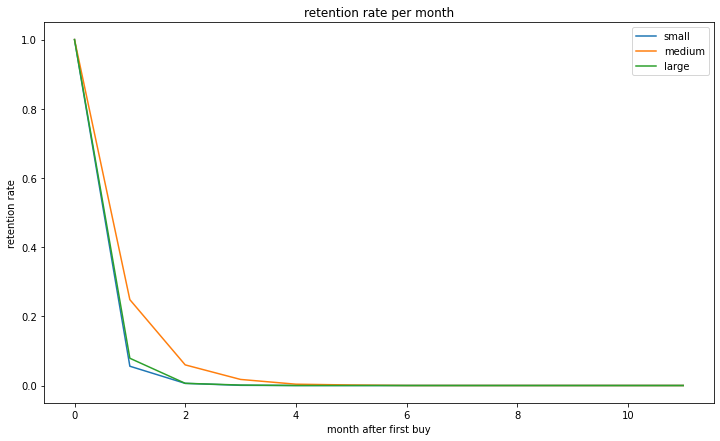

In [164]:
plt.figure(figsize=(12,7))
plt.plot( dict.keys() ,  dict.values()  , label = "small" ,  )  
plt.plot( dict2.keys() ,  dict2.values()   , label = "medium" )   
plt.plot( dict3.keys() ,  dict3.values()   , label = "large" )   

plt.legend()
plt.title("retention rate per month")
plt.xlabel("month after first buy")
plt.ylabel("retention rate")
 

# 2

In [165]:
transaction.isna().sum()

transaction_id        0
product_id            0
customer_id           0
transaction_date      0
online_order        360
product_size        197
dtype: int64

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import missingno as msno
from textwrap import wrap

In [189]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x): return dt.datetime(x.year, x.month, 1) 
# Create transaction_date column based on month and store in TransactionMonth
transaction['TransactionMonth'] = transaction['transaction_date'].apply(get_month) 
# Grouping by customer_id and select the InvoiceMonth value
grouping = transaction.groupby('customer_id')['TransactionMonth'] 
# Assigning a minimum InvoiceMonth value to the dataset
transaction['CohortMonth'] = grouping.transform('min')
# printing top 5 rows
display(transaction.head())

,transaction_id,product_id,customer_id,transaction_date,online_order,product_size,TransactionMonth,CohortMonth
0,1,2,2950,2017-02-25,0.0,medium,2017-02-01,2017-02-01
1,2,3,3120,2017-05-21,1.0,large,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,0.0,medium,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,0.0,medium,2017-08-01,2017-02-01
4,5,78,787,2017-10-01,1.0,large,2017-10-01,2017-01-01


In [190]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Getting the integers for date parts from the `InvoiceDay` column
transcation_year, transaction_month, _ = get_date_int(transaction, 'TransactionMonth')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(transaction, 'CohortMonth')

In [191]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation. 
 """
transaction['CohortIndex'] = years_diff * 12 + months_diff  + 1 
display(transaction.head(5))

,transaction_id,product_id,customer_id,transaction_date,online_order,product_size,TransactionMonth,CohortMonth,CohortIndex
0,1,2,2950,2017-02-25,0.0,medium,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21,1.0,large,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16,0.0,medium,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31,0.0,medium,2017-08-01,2017-02-01,7
4,5,78,787,2017-10-01,1.0,large,2017-10-01,2017-01-01,10


In [192]:
# Counting daily active user from each chort
grouping = transaction.groupby(['CohortMonth', 'CohortIndex'])
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
 # Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'customer_id')
# Printing top 5 rows of Dataframe
cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502


In [193]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
result = retention.round(3)*100
result

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


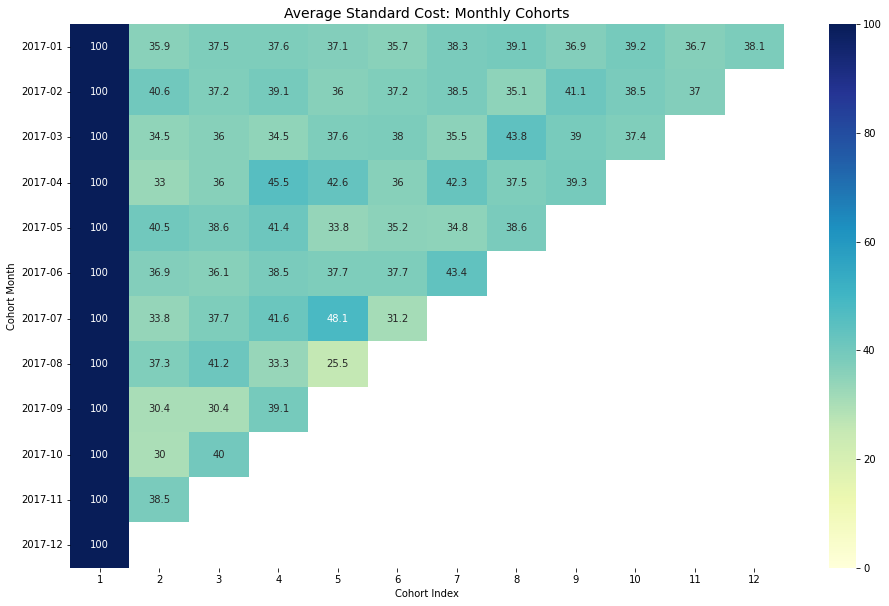

In [194]:
result.index = result.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(result, annot = True,vmin = 0.0, vmax =100 , cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()